In [27]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# load the data

In [30]:
#from tensorflow.keras.datasets import mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#mnist_dataset=mnist.load_data()
#np.save(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\train_images.npy", train_images)
#np.save(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\train_labels.npy", train_labels)
#np.save(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\test_images.npy", test_images)
#np.save(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\test_labels.npy", test_labels)

train_labels=np.load(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\train_labels.npy")
train_images=np.load(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\train_images.npy")
test_labels=np.load(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\test_labels.npy")
test_images=np.load(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\ML_Practice\mnist_data\test_images.npy")

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
len(train_labels)

60000

In [33]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
len(test_labels)

10000

In [36]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# deep learning with Keras

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [39]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [40]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.4408
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1160
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0731
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0384


In [41]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predictions:
         7            2            1            0            4            1            


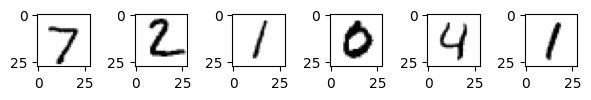

In [51]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
visualize=predictions[0:6]
plt.figure(figsize=(len(visualize),2))
text='Predictions:\n         '
for k,v in enumerate(visualize):
  text+=f'{predictions[k].argmax()}            '
  plt.subplot(1,len(visualize),k+1)

  plt.imshow(test_images[k].reshape(28,28), cmap=plt.cm.binary)
print(text)
plt.tight_layout()
plt.show()

In [44]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f'test_acc: {test_acc}')
print(f'test_loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.0735  
test_acc: 0.979200005531311
test_loss: 0.06227468326687813
